In [1]:
#!/usr/bin/env python
import numpy as np
import pandas as pd
import os
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

# 读取数据集

In [2]:
DF_R=pd.read_csv('../Car_Hacking_5%.csv')
# 2.将数据转换为图片
numeric_features = DF_R.dtypes[DF_R.dtypes != 'object'].index

In [3]:
DF_R

,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Label
0,1201,41,39,39,35,0,0,0,154,R
1,809,64,187,127,20,17,32,0,20,R
2,1349,216,0,0,136,0,0,0,0,R
3,1201,41,39,39,35,0,0,0,154,R
4,2,0,0,0,0,0,3,2,228,R
...,...,...,...,...,...,...,...,...,...,...
818435,848,5,32,52,104,117,0,0,12,R
818436,1088,255,0,0,0,255,134,9,0,R
818437,848,5,32,100,104,117,0,0,92,R
818438,1349,216,90,0,137,0,0,0,0,R


## 查看数据范围

原始的数据就是在0-255之间的，但是数据分布不太乱了

In [4]:
DF_R.max(),DF_R.min()

(CAN ID     2047
 DATA[0]     255
 DATA[1]     255
 DATA[2]     255
 DATA[3]     255
 DATA[4]     255
 DATA[5]     255
 DATA[6]     255
 DATA[7]     255
 Label      gear
 dtype: object,
 CAN ID       0
 DATA[0]      0
 DATA[1]      0
 DATA[2]      0
 DATA[3]      0
 DATA[4]      0
 DATA[5]      0
 DATA[6]      0
 DATA[7]      0
 Label      DoS
 dtype: object)

## 查看每一类的数据量

In [5]:
DF_R.Label.value_counts()/818440*100

R        85.752407
RPM       3.975734
gear      3.658668
DoS       3.604540
Fuzzy     3.008651
Name: Label, dtype: float64

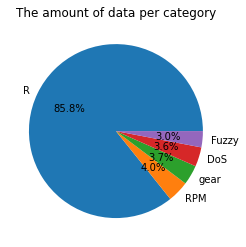

In [6]:
import matplotlib.pyplot as plt                #导入绘图包

a=DF_R.Label.value_counts()/818440*100
a.to_numpy()
plt.pie(a,labels=['R','RPM','gear','DoS','Fuzzy'], autopct='%3.1f%%')  #以时间为标签，总计成交笔数为数据绘制饼图，并显示3位整数一位小数
plt.title('The amount of data per category')             #加标题
plt.show()

# 展示一下生成的5类图片

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

def display_image_for_each_category(drit='G:/data',one='27.png',two='83.png',three='27.png',four='27.png',five='27.png'):
    ''':cvar
    Read the images for each category, the file name may vary (27.png, 83.png...)
    '''
    img1 = Image.open(drit+'/0/'+one)
    img2 = Image.open(drit+'/1/'+two)
    img3 = Image.open(drit+'/2/'+three)
    img4 = Image.open(drit+'/3/'+four)
    img5 = Image.open(drit+'/4/'+five)

    plt.figure(figsize=(10, 10))
    plt.subplot(1,5,1)
    plt.imshow(img1)
    plt.title("Normal")
    plt.subplot(1,5,2)
    plt.imshow(img2)
    plt.title("RPM Spoofing")
    plt.subplot(1,5,3)
    plt.imshow(img3)
    plt.title("Gear Spoofing")
    plt.subplot(1,5,4)
    plt.imshow(img4)
    plt.title("DoS Attack")
    plt.subplot(1,5,5)
    plt.imshow(img5)
    plt.title("Fuzzy Attack")
    plt.show()  # display it

# 数据探索

## 原始特征直方图

蓝色的是car id `CAN ID : identifier of CAN message in HEX (ex. 043f)` 感觉没有什么用

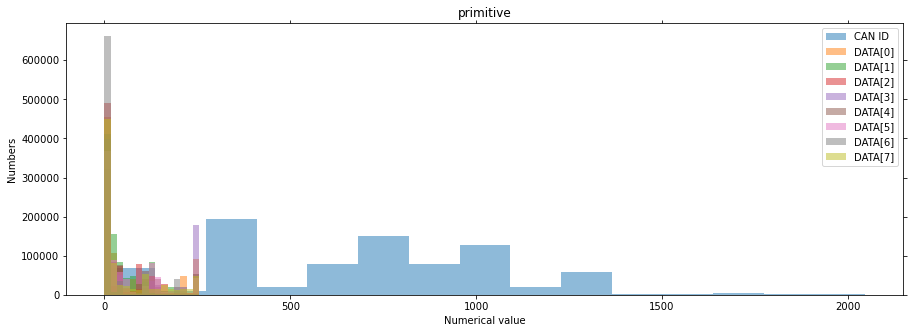

In [8]:
from PIL import Image, ImageStat
import math
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pylab

plt.figure(figsize=(15,5))
for i in range(9):
    plt.hist(DF_R[numeric_features].iloc[:,i], bins=15,alpha = 0.5,label=str(DF_R.columns.tolist()[i]))
plt.xlabel("Numerical value")
plt.ylabel("Numbers")
plt.tick_params(top='off', right='off')
plt.title('primitive')
plt.legend()
pylab.savefig('../img/primitive'+str(i))
plt.show()

## QQ曲线

In [9]:
# import statsmodels.api as sm
# import matplotlib.pyplot as plt
# for i in range(9):
#     sm.qqplot(DF_R[numeric_features].iloc[:,i], line='s')
#     pylab.savefig('../img/DF_R_'+str(i))

# QuantileTransformer转换

In [10]:
def showPicture(name_):
    from PIL import Image, ImageStat
    import math
    import os
    import matplotlib.pyplot as plt
    import numpy as np
    import cv2

    plt.figure(figsize=(15,5))
    for i in range(8):
        plt.hist(qt_df[numeric_features].iloc[:,i], bins=15,alpha = 0.5,label=str(qt_df.columns.tolist()[i]))
    plt.xlabel("Numerical value")
    plt.ylabel("Numbers")
    plt.tick_params(top='off', right='off')
    plt.title(name_)
    plt.legend()
    plt.show()

## 标准化

In [11]:
qt_df=DF_R.copy(deep=True)

In [12]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()
qt_df[numeric_features] = scaler.fit_transform(qt_df[numeric_features])
# df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [13]:
qt_df[numeric_features].describe()

,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7]
count,818440.000000,818440.000000,818440.000000,818440.000000,818440.000000,818440.000000,818440.000000,818440.000000,818440.000000
mean,0.500957,0.446553,0.424100,0.351264,0.430207,0.414879,0.440265,0.332284,0.364480
std,0.289751,0.353009,0.366684,0.394662,0.406113,0.375460,0.357183,0.396614,0.392513
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.262262,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.479980,0.497497,0.453954,0.000000,0.509510,0.503003,0.506507,0.000000,0.000000
75%,0.749249,0.754254,0.759259,0.781782,0.746246,0.758258,0.746246,0.751251,0.747247
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


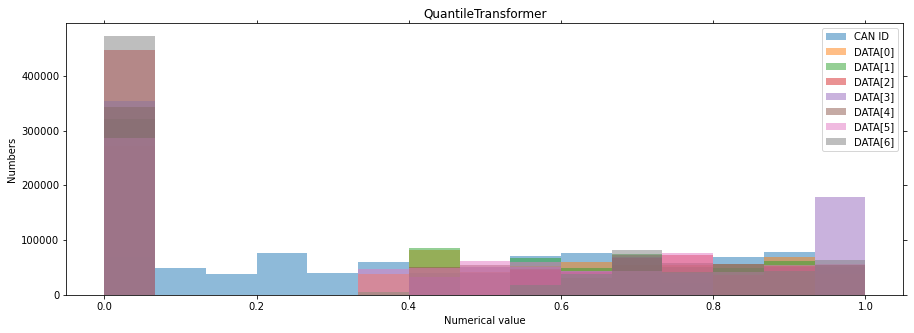

In [14]:
 showPicture('QuantileTransformer')

## 降采样

In [15]:
X=qt_df[numeric_features]
y=qt_df['Label']

from imblearn.under_sampling import NearMiss
nm_1 = NearMiss() #形参默认 version=1, 即采用 NearMiss-1
X_resampled, y_resampled = nm_1.fit_resample(X, y)

qt_df=pd.merge(X_resampled,y_resampled,left_index=True,right_index=True)
print(qt_df.Label.value_counts())

DoS      24624
Fuzzy    24624
R        24624
RPM      24624
gear     24624
Name: Label, dtype: int64


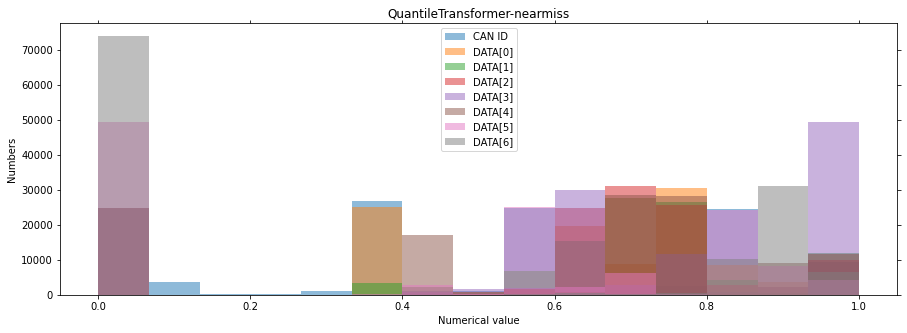

In [16]:
 showPicture('QuantileTransformer-nearmiss')

## 归一化

In [17]:
qt_df[numeric_features] = qt_df[numeric_features].apply(lambda x: (x*255))

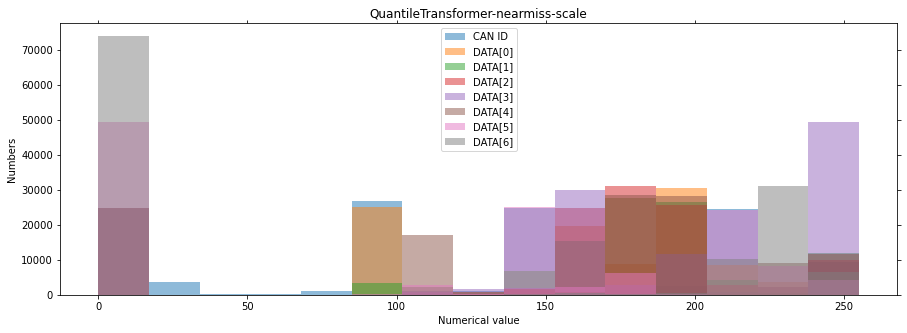

In [18]:
 showPicture('QuantileTransformer-nearmiss-scale')

## 分类

In [ ]:
df=qt_df.copy(deep=True)

df0=df[df['Label']=='R'].drop(['Label'],axis=1)
df1=df[df['Label']=='RPM'].drop(['Label'],axis=1)
df2=df[df['Label']=='gear'].drop(['Label'],axis=1)
df3=df[df['Label']=='DoS'].drop(['Label'],axis=1)
df4=df[df['Label']=='Fuzzy'].drop(['Label'],axis=1)

def generate_image(DF,ditrr='../data/train_qt/', image_p = ""):
    ''':cvar
    Generate 9*9 color images for class 0 (Normal)
    Change the numbers 9 to the number of features n in your dataset if you use a different dataset, reshape(n,n,3)
    '''
    count=0
    ims = []
    image_path = ditrr + image_p
    os.makedirs(image_path)

    for i in range(0, len(DF)):
        count=count+1
        if count<=27:
            im=DF.iloc[i].values
            ims=np.append(ims,im)
        else:
            ims=np.array(ims).reshape(9,9,3)
            array = np.array(ims, dtype=np.uint8)
            new_image = Image.fromarray(array)
            new_image.save(image_path+str(i)+'.png')
            count=0
            ims = []

generate_image(df0,image_p = "0/") # normal
generate_image(df1,image_p = "1/")
generate_image(df2,image_p = "2/")
generate_image(df3,image_p = "3/") # dos attack
generate_image(df4,image_p = "4/") # fuzzy attack

In [ ]:
display_image_for_each_category(drit='../data/train_qt',one='27.png',two='83.png',three='27.png',four='27.png',five='27.png')

# yeo-johnson转换

In [19]:
def showPicture(name_):
    from PIL import Image, ImageStat
    import math
    import os
    import matplotlib.pyplot as plt
    import numpy as np
    import cv2

    plt.figure(figsize=(15,5))
    for i in range(9):
        plt.hist(yeo_df[numeric_features].iloc[:,i], bins=15,alpha = 0.5,label=str(yeo_df.columns.tolist()[i]))
    plt.xlabel("Numerical value")
    plt.ylabel("Numbers")
    plt.tick_params(top='off', right='off')
    plt.title(name_)
    plt.legend()
    plt.show()

In [20]:
DF_R

,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Label
0,1201,41,39,39,35,0,0,0,154,R
1,809,64,187,127,20,17,32,0,20,R
2,1349,216,0,0,136,0,0,0,0,R
3,1201,41,39,39,35,0,0,0,154,R
4,2,0,0,0,0,0,3,2,228,R
...,...,...,...,...,...,...,...,...,...,...
818435,848,5,32,52,104,117,0,0,12,R
818436,1088,255,0,0,0,255,134,9,0,R
818437,848,5,32,100,104,117,0,0,92,R
818438,1349,216,90,0,137,0,0,0,0,R


In [21]:
yeo_df=DF_R.copy(deep=True)

## 标准化

In [22]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
yeo_df[numeric_features]=scaler.fit_transform(yeo_df[numeric_features])

In [23]:
yeo_df[numeric_features].describe()

,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7]
count,8.184400e+05,8.184400e+05,8.184400e+05,8.184400e+05,8.184400e+05,8.184400e+05,8.184400e+05,8.184400e+05,8.184400e+05
mean,-3.991599e-13,1.751923e-13,7.174346e-15,-4.587719e-13,3.773322e-13,-7.415923e-14,-2.187703e-13,-2.172077e-13,1.293264e-13
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-2.192280e+00,-1.178105e+00,-1.185595e+00,-8.965118e-01,-1.077069e+00,-1.091400e+00,-1.179818e+00,-8.222196e-01,-9.299709e-01
25%,-7.980593e-01,-1.178105e+00,-1.185595e+00,-8.965118e-01,-1.077069e+00,-1.091400e+00,-1.179818e+00,-8.222196e-01,-9.299709e-01
50%,1.280937e-01,-1.473324e-02,3.817893e-01,-8.965118e-01,2.308893e-01,2.651124e-01,3.601800e-01,-8.222196e-01,-9.299709e-01
75%,9.149125e-01,9.159685e-01,8.225598e-01,1.200767e+00,1.003029e+00,1.091088e+00,1.038137e+00,9.536350e-01,1.151285e+00
max,2.671370e+00,1.436664e+00,1.691630e+00,1.450953e+00,1.250547e+00,1.461472e+00,1.404056e+00,1.645167e+00,1.383268e+00


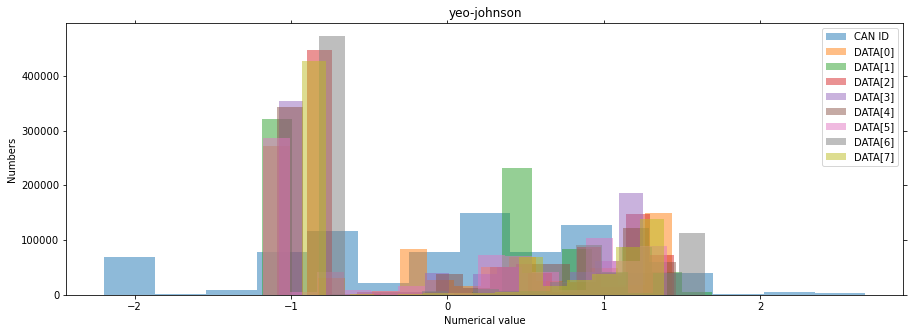

In [24]:
 showPicture('yeo-johnson')

## 降采样

In [25]:
X=yeo_df[numeric_features]
y=yeo_df['Label']

from imblearn.under_sampling import NearMiss
nm_1 = NearMiss() #形参默认 version=1, 即采用 NearMiss-1
X_resampled, y_resampled = nm_1.fit_resample(X, y)

yeo_df=pd.merge(X_resampled,y_resampled,left_index=True,right_index=True)
print(yeo_df.Label.value_counts())

DoS      24624
Fuzzy    24624
R        24624
RPM      24624
gear     24624
Name: Label, dtype: int64


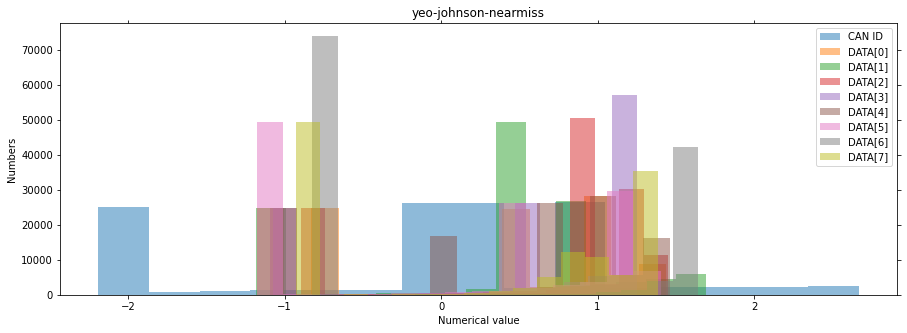

In [26]:
 showPicture('yeo-johnson-nearmiss')

## 归一化

In [27]:
from sklearn.preprocessing import minmax_scale
yeo_df[numeric_features]=minmax_scale(yeo_df[numeric_features])
yeo_df[numeric_features] = yeo_df[numeric_features].apply(lambda x: (x*255))

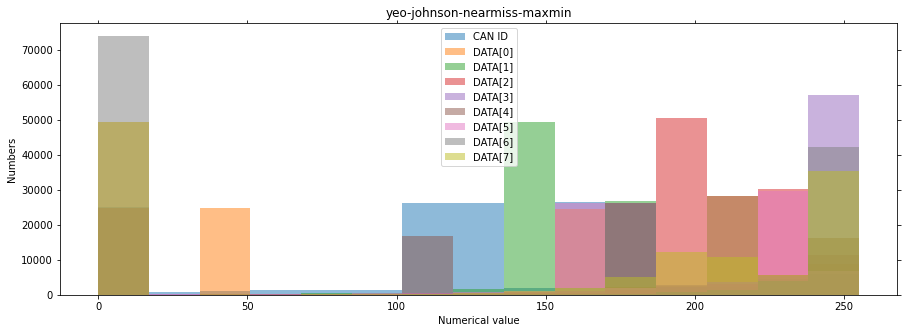

In [28]:
 showPicture('yeo-johnson-nearmiss-maxmin')

## 分类

In [ ]:
df=yeo_df.copy(deep=True)

In [ ]:
df0=df[df['Label']=='R'].drop(['Label'],axis=1)
df1=df[df['Label']=='RPM'].drop(['Label'],axis=1)
df2=df[df['Label']=='gear'].drop(['Label'],axis=1)
df3=df[df['Label']=='DoS'].drop(['Label'],axis=1)
df4=df[df['Label']=='Fuzzy'].drop(['Label'],axis=1)

def generate_image(DF,ditrr='../data/train_yeo/', image_p = ""):
    ''':cvar
    Generate 9*9 color images for class 0 (Normal)
    Change the numbers 9 to the number of features n in your dataset if you use a different dataset, reshape(n,n,3)
    '''
    count=0
    ims = []
    image_path = ditrr + image_p
    os.makedirs(image_path)

    for i in range(0, len(DF)):
        count=count+1
        if count<=27:
            im=DF.iloc[i].values
            ims=np.append(ims,im)
        else:
            ims=np.array(ims).reshape(9,9,3)
            array = np.array(ims, dtype=np.uint8)
            new_image = Image.fromarray(array)
            new_image.save(image_path+str(i)+'.png')
            count=0
            ims = []

generate_image(df0,image_p = "0/") # normal
generate_image(df1,image_p = "1/")
generate_image(df2,image_p = "2/")
generate_image(df3,image_p = "3/") # dos attack
generate_image(df4,image_p = "4/") # fuzzy attack

In [ ]:
display_image_for_each_category(drit='../data/train_yeo',one='27.png',two='83.png',three='27.png',four='27.png',five='27.png')

# Box-Cox转换[没法转换]

In [ ]:
box_df=DF_R.copy(deep=True)

In [ ]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='box-cox')
box_df[numeric_features]=scaler.fit_transform(box_df[numeric_features])

# QuantileTransformer-正则转换

In [40]:
def showPicture(name_):
    from PIL import Image, ImageStat
    import math
    import os
    import matplotlib.pyplot as plt
    import numpy as np
    import cv2

    plt.figure(figsize=(15,5))
    for i in range(9):
        plt.hist(qtn_df[numeric_features].iloc[:,i], bins=15,alpha = 0.5,label=str(qtn_df.columns.tolist()[i]))
    plt.xlabel("Numerical value")
    plt.ylabel("Numbers")
    plt.tick_params(top='off', right='off')
    plt.title(name_)
    plt.legend()
    plt.show()

## 标准化

In [30]:
qtn_df=DF_R.copy(deep=True)

In [31]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(output_distribution='normal')
qtn_df[numeric_features] = scaler.fit_transform(qtn_df[numeric_features])

In [32]:
qtn_df[numeric_features].describe()

,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7]
count,818440.000000,818440.000000,818440.000000,818440.000000,818440.000000,818440.000000,818440.000000,818440.000000,818440.000000
mean,-0.108759,-1.224408,-1.653994,-2.440324,-1.014391,-1.606398,-1.298895,-2.613202,-2.178961
std,1.331761,3.009898,2.892302,3.046542,4.070426,3.247085,3.051059,3.046164,3.281051
min,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
25%,-0.641002,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
50%,-0.055229,-0.017565,-0.118204,-5.199338,0.032625,0.002509,0.017565,-5.199338,-5.199338
75%,0.662724,0.694311,0.697507,0.779924,0.667419,0.694311,0.654930,0.684763,0.681594
max,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338


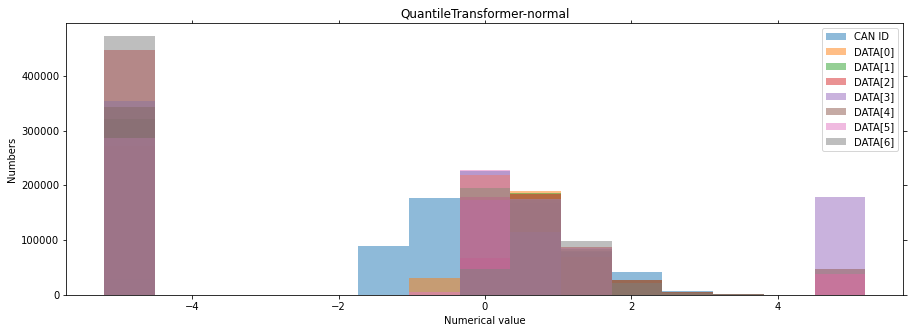

In [33]:
showPicture('QuantileTransformer-normal')

## 降采样

In [34]:
X=qtn_df[numeric_features]
y=qtn_df['Label']

from imblearn.under_sampling import NearMiss
nm_1 = NearMiss() #形参默认 version=1, 即采用 NearMiss-1
X_resampled, y_resampled = nm_1.fit_resample(X, y)

qtn_df=pd.merge(X_resampled,y_resampled,left_index=True,right_index=True)
print(qtn_df.Label.value_counts())

DoS      24624
Fuzzy    24624
R        24624
RPM      24624
gear     24624
Name: Label, dtype: int64


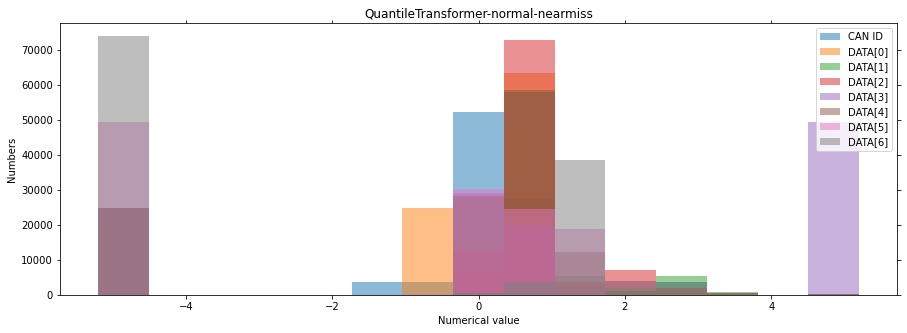

In [35]:
showPicture('QuantileTransformer-normal-nearmiss')

## 归一化

In [36]:
from sklearn.preprocessing import minmax_scale
qtn_df[numeric_features]=minmax_scale(qtn_df[numeric_features])
qtn_df[numeric_features] = qtn_df[numeric_features].apply(lambda x: (x*255))

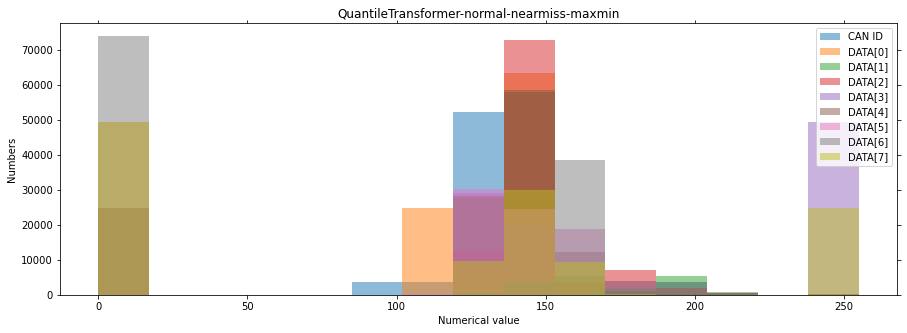

In [41]:
showPicture('QuantileTransformer-normal-nearmiss-maxmin')

## 分类

In [38]:
df=qtn_df.copy(deep=True)

In [39]:
df0=df[df['Label']=='R'].drop(['Label'],axis=1)
df1=df[df['Label']=='RPM'].drop(['Label'],axis=1)
df2=df[df['Label']=='gear'].drop(['Label'],axis=1)
df3=df[df['Label']=='DoS'].drop(['Label'],axis=1)
df4=df[df['Label']=='Fuzzy'].drop(['Label'],axis=1)

def generate_image(DF,ditrr='../data/train_qnt/', image_p = ""):
    ''':cvar
    Generate 9*9 color images for class 0 (Normal)
    Change the numbers 9 to the number of features n in your dataset if you use a different dataset, reshape(n,n,3)
    '''
    count=0
    ims = []
    image_path = ditrr + image_p
    os.makedirs(image_path)

    for i in range(0, len(DF)):
        count=count+1
        if count<=27:
            im=DF.iloc[i].values
            ims=np.append(ims,im)
        else:
            ims=np.array(ims).reshape(9,9,3)
            array = np.array(ims, dtype=np.uint8)
            new_image = Image.fromarray(array)
            new_image.save(image_path+str(i)+'.png')
            count=0
            ims = []

generate_image(df0,image_p = "0/") # normal
generate_image(df1,image_p = "1/")
generate_image(df2,image_p = "2/")
generate_image(df3,image_p = "3/") # dos attack
generate_image(df4,image_p = "4/") # fuzzy attack

FileExistsError: [WinError 183] 当文件已存在时，无法创建该文件。: '../data/train_qnt/0/'

In [ ]:
display_image_for_each_category(drit='../data/train_qnt',one='27.png',two='83.png',three='27.png',four='27.png',five='27.png')

In [ ]:
# import statsmodels.api as sm
# import matplotlib.pyplot as plt
# for i in range(8):
#     sm.qqplot(qtn_df[numeric_features].iloc[:,i], line='s')
#     pylab.savefig('../img/qtn_'+str(i))

In [ ]:
# from imblearn.over_sampling import SMOTE
# X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [ ]:
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=0)
# X_resampled, y_resampled = rus.fit_resample(X, y)